In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import itertools

from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

np.set_printoptions(precision = 3)

In [33]:
import plotly.io as pio
pio.renderers
pio.renderers.default = "browser"

In [34]:
RANDOM_STATE = 42
df = pd.read_csv('assets/updated_house_df.csv')

In [35]:
df.head()

,deed_date,land_sale_price,total_sale_price,assessed_building_value,story_height,heated_area,bath,bath_fixtures,physical_zip_code,physical_city,...,demand,wake_supply_index,wake_demand_index,year,crime,electric,gas,water,sewer,all
0,2000-05-01,0.0,17500.0,134923.0,1.0,1300,1.5,0,27603,raleigh,...,120.5,NaN,NaN,2000,2049,1,0,0,0,0
1,2000-06-01,0.0,144000.0,174591.0,1.0,1888,2.0,0,27604,raleigh,...,120.5,NaN,NaN,2000,2049,1,1,1,1,1
2,2000-05-01,0.0,259000.0,248271.0,2.0,2648,2.5,0,27607,raleigh,...,120.5,NaN,NaN,2000,2049,1,1,1,1,1
3,2000-04-01,0.0,131000.0,174298.0,1.0,2148,2.0,0,27604,raleigh,...,120.5,NaN,NaN,2000,2049,1,1,1,1,1
4,2000-05-01,0.0,110000.0,115151.0,1.0,1216,1.5,0,27604,raleigh,...,120.5,NaN,NaN,2000,2049,1,1,1,1,1


In [36]:
df.describe()

,land_sale_price,total_sale_price,assessed_building_value,story_height,heated_area,bath,bath_fixtures,physical_zip_code,street_number,mort_rate,...,demand,wake_supply_index,wake_demand_index,year,crime,electric,gas,water,sewer,all
count,2.590240e+05,2.590240e+05,2.590240e+05,259024.000000,259024.000000,259024.000000,259024.000000,259024.000000,259024.000000,259024.000000,...,259024.000000,123764.000000,123764.000000,259024.000000,259024.000000,259024.000000,259024.000000,259024.000000,259024.000000,259024.000000
mean,2.622525e+04,3.204601e+05,2.751168e+05,1.637132,2321.931894,2.551833,0.414151,27571.198233,2839.085401,4.297406,...,154.159146,75.628801,54.704275,2014.385841,607.663726,0.994688,0.775500,0.849763,0.814743,0.765408
std,5.845489e+04,7.940791e+05,6.335349e+05,0.441990,1047.970929,0.656652,1.912433,41.780309,2949.459508,1.212850,...,20.318735,13.471979,12.883712,5.949321,814.225963,0.072691,0.417254,0.357304,0.388507,0.423744
min,0.000000e+00,5.000000e+00,0.000000e+00,1.000000,220.000000,0.000000,-8.000000,27502.000000,0.000000,2.680000,...,107.100000,52.758402,31.325301,2000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000e+00,1.715000e+05,1.639430e+05,1.000000,1568.000000,2.000000,0.000000,27526.000000,500.000000,3.450000,...,146.300000,65.440710,44.071021,2010.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,0.000000e+00,2.650000e+05,2.306885e+05,1.880000,2143.000000,2.500000,0.000000,27587.000000,1621.000000,3.970000,...,159.700000,72.986684,54.850983,2016.000000,107.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,3.972300e+04,3.840000e+05,3.236000e+05,2.000000,2858.000000,3.000000,0.000000,27610.000000,4531.000000,4.830000,...,169.200000,88.585923,68.801522,2019.000000,1468.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,5.538500e+06,7.060000e+07,5.673290e+07,4.000000,38730.000000,4.000000,55.000000,27617.000000,28000.000000,8.520000,...,193.300000,99.112238,73.493976,2021.000000,2245.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#Visualize Raw Data

Text(0.5, 1.0, 'Viz of Raw Data')

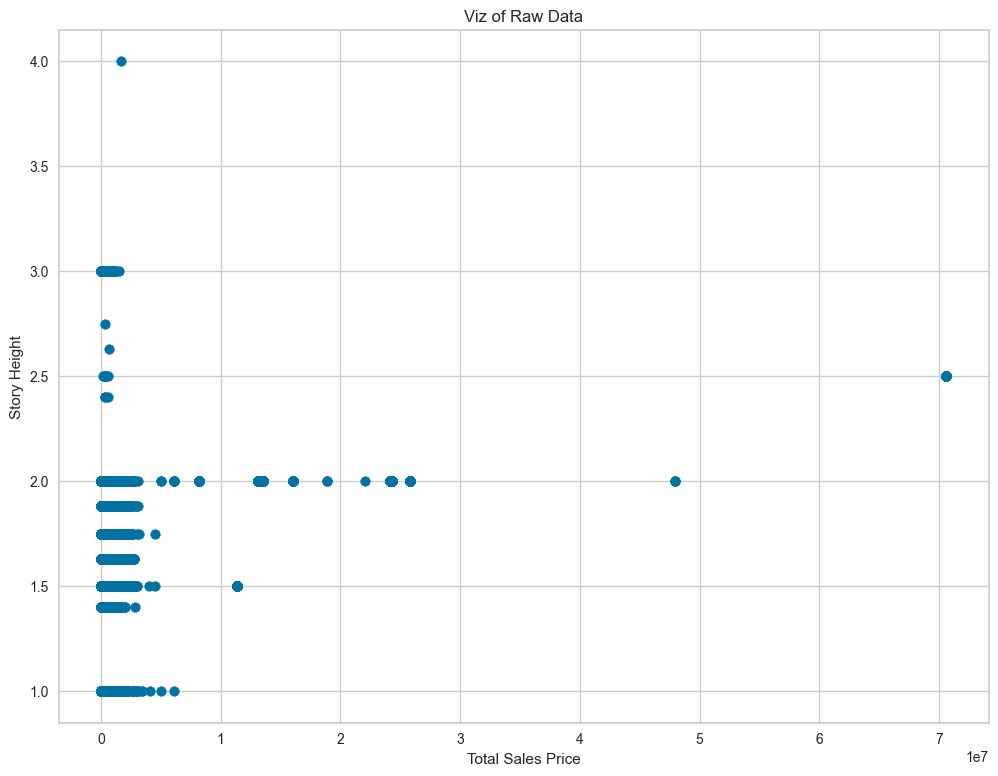

In [37]:
#Scatter across total sale price and story height 
plt.figure(figsize=(12,9))
plt.scatter(df.iloc[:, 2], df.iloc[:, 4])
plt.xlabel('Total Sales Price')
plt.ylabel('Story Height')
plt.title('Viz of Raw Data')


In [38]:
df['isCovid'] = df['covid_cases'].apply(lambda x: 1 if x > 0 else 0)

#df['deed_date'] = pd.to_datetime(df['deed_date'])
#df['deed_year'] = df['deed_date'].dt.year
#df['deed_month'] = df['deed_date'].dt.month

df['physical_city_cat'] = df['physical_city'].astype('category')
df['physical_city_codes'] = df['physical_city'].astype('category').cat.codes

df['planning_jurisdiction_cat'] = df['planning_jurisdiction'].astype('category')
df['planning_jurisdiction_codes'] = df['planning_jurisdiction'].astype('category').cat.codes

df['physical_zip_code_cat'] = df['physical_zip_code'].astype('category')
df['physical_zip_code_codes'] = df['physical_zip_code'].astype('category').cat.codes


#city reference dict
print(dict(enumerate(df['physical_city_cat'].cat.categories)))

#planning_jurisdiction reference dict
print(dict(enumerate(df['physical_zip_code_cat'].cat.categories)))


#number of zip codes
print(len(df['physical_zip_code'].unique()))

{0: 'apex', 1: 'cary', 2: 'fuquay varina', 3: 'garner', 4: 'holly springs', 5: 'knightdale', 6: 'morrisville', 7: 'raleigh', 8: 'rolesville', 9: 'wake forest', 10: 'wendell', 11: 'zebulon'}
{0: 27502, 1: 27511, 2: 27513, 3: 27518, 4: 27519, 5: 27523, 6: 27526, 7: 27529, 8: 27539, 9: 27540, 10: 27545, 11: 27560, 12: 27571, 13: 27587, 14: 27591, 15: 27597, 16: 27601, 17: 27603, 18: 27604, 19: 27605, 20: 27606, 21: 27607, 22: 27608, 23: 27609, 24: 27610, 25: 27612, 26: 27613, 27: 27614, 28: 27615, 29: 27616, 30: 27617}
31


Set your file names here

In [64]:
name='postCovid_StdScaler'

isCovid = 1
scaler = StandardScaler()


In [65]:
cols = ['street_name', 'address', 'street_type', 'deed_date', 'planning_jurisdiction', 'physical_city_cat', 'street_number',
'planning_jurisdiction_cat', 'physical_city', 'planning_jurisdiction', 'wake_supply_index', 'wake_demand_index', 
'deed_date', 'physical_zip_code', 'physical_zip_code_cat',
'land_sale_price', 'total_sale_price', 'assessed_building_value', 'covid_cases', 
'isCovid', 
'supply', 'demand']

df_temp = df[df['isCovid']== isCovid].drop(columns=cols)
df_temp.shape

(55786, 21)

In [66]:
df_temp.dtypes

story_height                   float64
heated_area                      int64
bath                           float64
bath_fixtures                    int64
mort_rate                      float64
unemploy_rate                  float64
pop_growth_rate                float64
lumber_price                   float64
metals_price                   float64
build_price                    float64
int_rate                       float64
year                             int64
crime                            int64
electric                         int64
gas                              int64
water                            int64
sewer                            int64
all                              int64
physical_city_codes               int8
planning_jurisdiction_codes       int8
physical_zip_code_codes           int8
dtype: object

In [67]:
# get a sample for modelling to shortern time

#df_sample = df_temp.sample(frac=0.2, replace=False, random_state=RANDOM_STATE).reset_index().drop(columns=['index'])

In [68]:
#df_temp.shape, df_sample.shape

#Preprocessing - Standardization

In [69]:

df_std = scaler.fit_transform(df_temp)


PCA

In [70]:
from sklearn.decomposition import PCA

pca = PCA(random_state=RANDOM_STATE)
pca.fit(df_std)

PCA(random_state=42)

In [71]:
# The attribute shows how much variasnce is explained bu each of the individual components
explained = pca.explained_variance_ratio_
print(len(explained))
explained

21


array([2.768e-01, 1.797e-01, 1.310e-01, 8.484e-02, 6.546e-02, 5.103e-02,
       4.729e-02, 3.444e-02, 3.336e-02, 2.842e-02, 1.398e-02, 1.333e-02,
       1.280e-02, 1.007e-02, 7.710e-03, 4.308e-03, 3.445e-03, 1.425e-03,
       5.820e-04, 5.418e-33, 1.029e-33])

In [72]:
# component loadings or weights (correlation coefficient between original variables and the component) 
# component loadings represents the elements of the eigenvector
# the squared loadings within the PCs always sums to 1
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df_temp.columns.values
loadings_df = loadings_df.set_index('variable').round(3)


In [73]:
fig = px.imshow(loadings_df, text_auto=True, color_continuous_scale='RdBu_r')
fig.write_html(name+"_pca_heatmap.html")
fig.show()

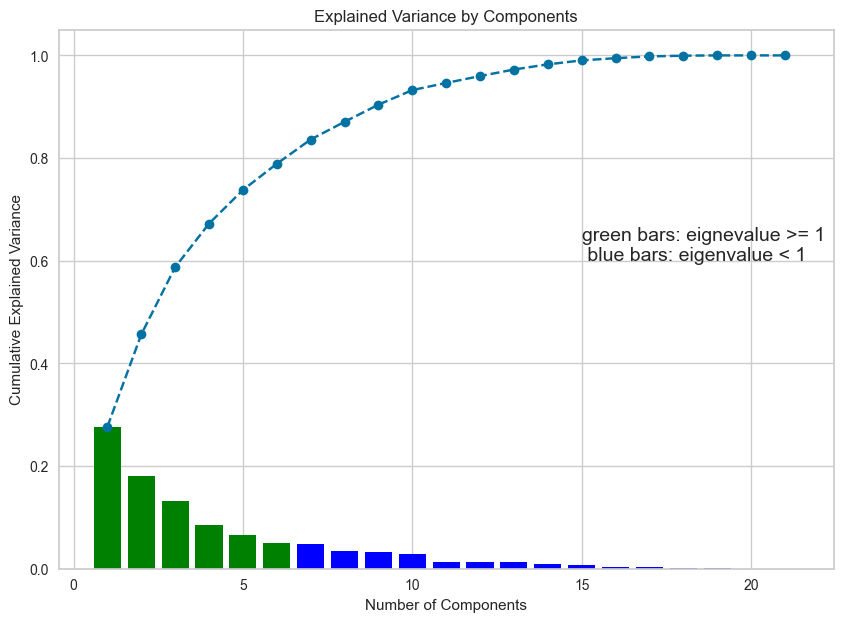

In [74]:
colors = ["green" if i >= 1 else "blue" for i in pca.explained_variance_]

plt.figure(figsize = (10,7))
plt.plot(range(1, len(explained)+1), explained.cumsum(), marker='o', linestyle = '--')
plt.bar(range(1, len(explained)+1), explained, color = colors)
plt.text(15, 0.6, 'green bars: eignevalue >= 1\n blue bars: eigenvalue < 1', fontsize = 14)
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.savefig(name+'_pca_screeplot.png')
plt.show()

In [75]:
# The eigenvalues (variance explained by each PC) for PCs can help to retain the number of PCs. Generally, PCs with eigenvalues > 1 contributes greater variance and should be retained for further analysis.


# get eigenvalues 
print(pca.explained_variance_)


[5.813e+00 3.773e+00 2.751e+00 1.782e+00 1.375e+00 1.072e+00 9.931e-01
 7.233e-01 7.006e-01 5.967e-01 2.936e-01 2.799e-01 2.687e-01 2.115e-01
 1.619e-01 9.047e-02 7.234e-02 2.993e-02 1.222e-02 1.138e-31 2.161e-32]


we perform PCA with the chosen number of components.

In [76]:
PC_chosen = 6

In [77]:
pca = PCA(n_components=PC_chosen, random_state=RANDOM_STATE)

#fit the model with our data in the selected # of components
pca.fit(df_std)


PCA(n_components=6, random_state=42)

In [78]:
# We need only the calculated resulting components scores for the elements in our data set
scores_pca = pca.transform(df_std)

#we will use this score for kmeans, we do segmentation based on PCA instead of original df.

K-Means Clustering - Elbow Method

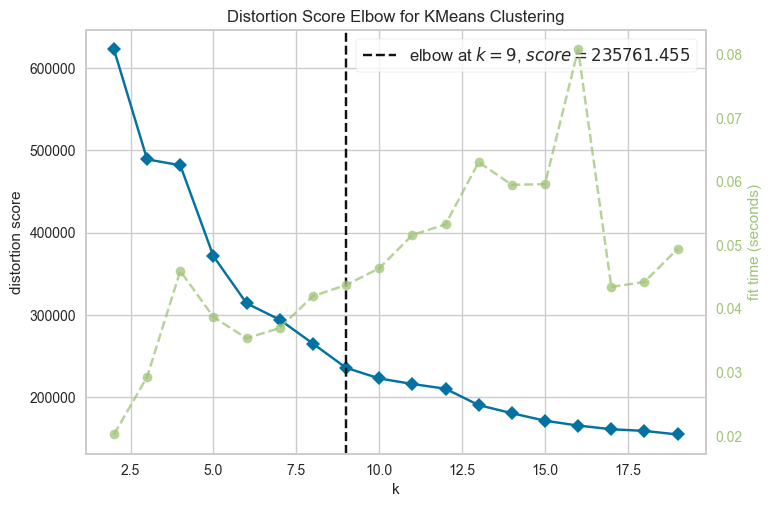

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [79]:
kmeans_elbow = KMeans(init='k-means++', max_iter=100, n_init=1, random_state=RANDOM_STATE)

elb_visualizer = KElbowVisualizer(kmeans_elbow, k=(2,20))
elb_visualizer.fit(scores_pca)    
elb_visualizer.show() 

FItting the model

In [88]:
k=9

In [89]:
kmeans = KMeans(n_clusters = k, init='k-means++', max_iter=100, n_init=1, random_state=RANDOM_STATE)

#Silhouette Score

#visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
#visualizer.fit(scores_pca)        # Fit the data to the visualizer
#visualizer.show()        # Finalize and render the figure

In [90]:
#We fit our data with kmeanspca model

kmeans.fit(scores_pca)

KMeans(max_iter=100, n_clusters=9, n_init=1, random_state=42)

K-means clustering with PCA results

In [91]:
# create a new DF with original features and add PCA scores and assigned clusters
df_seg_pca_kmeans = pd.concat([df_temp.reset_index(drop=True), pd.DataFrame(scores_pca)], axis =1)
PC = ['PC'+str(i+1) for i in range(0,PC_chosen)]
df_seg_pca_kmeans.columns.values[-PC_chosen:] = PC 

# add the last column with the clustering labels
df_seg_pca_kmeans['ClusterLabels'] = kmeans.labels_

# name the clusters segments
#df_seg_pca_kmeans['Segments'] = df_seg_pca_kmeans['ClusterLabels'].map({0:''})

In [92]:
df_seg_pca_kmeans.head()

,story_height,heated_area,bath,bath_fixtures,mort_rate,unemploy_rate,pop_growth_rate,lumber_price,metals_price,build_price,...,physical_city_codes,planning_jurisdiction_codes,physical_zip_code_codes,PC1,PC2,PC3,PC4,PC5,PC6,ClusterLabels
0,1.00,1020,2.0,0,2.94,5.8,0.017201,270.2,200.4,179.8,...,7,8,18,2.951470,-0.719159,-2.106155,-1.350423,-0.910635,-0.013557,4
1,1.00,1282,2.0,0,2.77,4.6,0.017201,264.2,211.1,177.5,...,7,8,18,2.740114,-0.709521,-2.069603,-1.159023,-1.909226,-0.064503,4
2,2.00,2340,2.5,0,2.89,5.4,0.017201,322.0,205.2,197.6,...,7,8,21,2.387382,-0.787842,-1.432412,0.949737,-1.391940,-0.301406,4
3,1.75,3209,3.5,0,2.77,4.6,0.017201,264.2,211.1,177.5,...,7,8,21,2.759830,-0.710189,-0.851996,1.978027,-1.730225,-0.435488,4
4,2.00,2551,2.5,0,2.83,4.5,0.017201,301.3,207.4,196.4,...,7,8,21,2.343275,-0.779720,-1.387294,1.074867,-1.756909,-0.310001,4


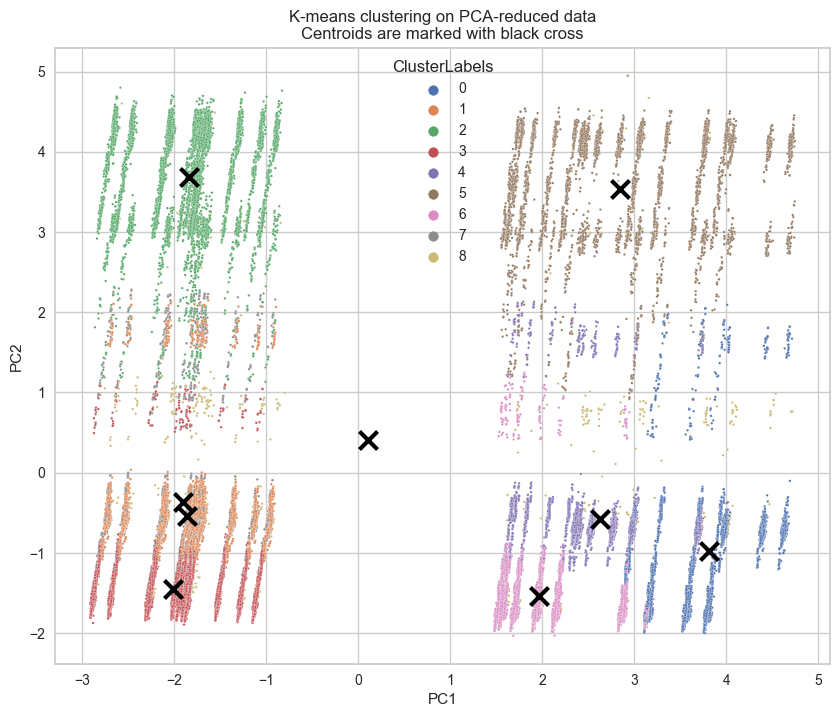

In [93]:
# plot the data by pca components
plt.figure(figsize=(10,8))
sns.scatterplot(df_seg_pca_kmeans, x='PC1', y='PC2', s=3, hue = df_seg_pca_kmeans['ClusterLabels'], palette="deep")
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="black",
    zorder=10,
)
plt.title(
    "K-means clustering on PCA-reduced data\n"
    "Centroids are marked with black cross")
plt.savefig(name+'_pca_kmeans_scatter2D.png')
plt.show()

In [94]:
# Biplot - same thing as above but now with PC and loadings 

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
features = df_temp.columns.to_list()
color = df_seg_pca_kmeans['ClusterLabels'].astype(str)

fig = px.scatter(scores_pca, x=0, y=1, color=color,
color_discrete_sequence=px.colors.qualitative.Set2
#color_continuous_scale=px.colors.sequential.Purpor #px.colors.diverging.Sunset
)
fig.update_traces(marker_size = 2)
for i, feature in enumerate(features):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1]
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )
fig.write_html(name+"_pca_biplot.html")

In [95]:
#PCA x kmean cluster 3D

color = df_seg_pca_kmeans['ClusterLabels'].astype(str)

fig = px.scatter_3d(scores_pca, x=0, y=1, z=2, color=color,
color_discrete_sequence=px.colors.qualitative.Set2
#color_continuous_scale=px.colors.sequential.Purpor #px.colors.diverging.Sunset
)
fig.update_traces(marker_size = 2)
fig.write_html(name+"_pca_kmeans_scatter3D.html")